In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
fashion_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
fashion_train.shape

(60000, 785)

In [6]:
fashion_test.shape

(10000, 785)

In [7]:
#Remove the clasification lables 
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

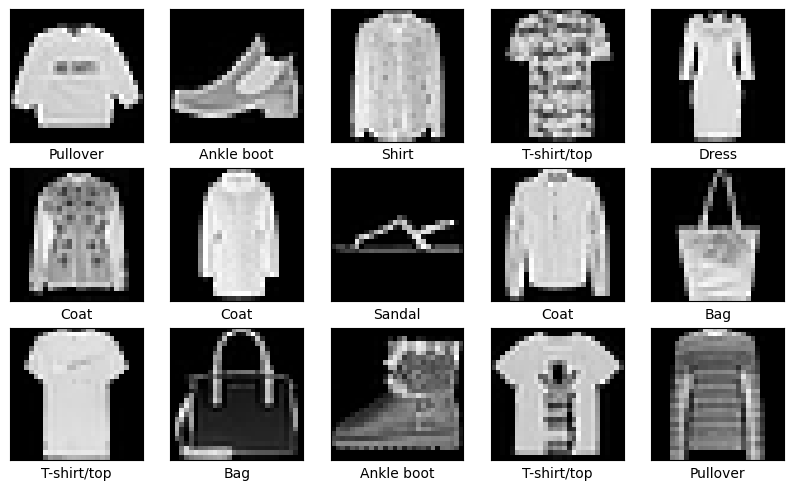

In [8]:
#Reshaping the dataset to change that from 1D vector to 2d image shape(784 to 28*28)
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [9]:
#Encoding Digit MNIST Labels
#to_categorical takes an array of integers (e.g., y_train_fashion which has labels from 0 to 9) and converts 
#each integer into a binary vector with length equal to the number of classes (num_classes=10).
#For example, if a label is 3, it would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], where 1 is at the index of the label and the rest are 0s.
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [10]:
y_train_fashion


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [11]:
y_train_fashion[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
X_train_fashion

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_test_fashion

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
y_train_fashion.shape

(60000, 10)

# Model, compile and fit method to predict the output

In [30]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))

C:\Users\Prabhu\anaconda3\envs\VEAI\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6111 - loss: 1.1408 - val_accuracy: 0.8382 - val_loss: 0.4628
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8034 - loss: 0.5701 - val_accuracy: 0.8490 - val_loss: 0.4282
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8163 - loss: 0.5237 - val_accuracy: 0.8531 - val_loss: 0.4211
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8253 - loss: 0.5002 - val_accuracy: 0.8588 - val_loss: 0.4026
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8406 - loss: 0.4645 - val_accuracy: 0.8598 - val_loss: 0.4020
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8389 - loss: 0.4621 - val_accuracy: 0.8685 - val_loss: 0.3820
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8450 - loss: 0.4387 - val_accuracy: 0.8713 - val_loss: 0.3683
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8501 - loss: 0.4331 - val_accuracy: 0

In [31]:
print("Training Accuracy:\n", history.history['accuracy'])
print("Training Loss: \n", history.history['loss'])
print("Validation Accuracy: \n", history.history['val_accuracy'])
print("Validation Loss:\n", history.history['val_loss'])

Training Accuracy:
 [0.7145666480064392, 0.8081166744232178, 0.8195333480834961, 0.8273833394050598, 0.8384666442871094, 0.840416669845581, 0.8453666567802429, 0.8488333225250244, 0.8519499897956848, 0.8494499921798706, 0.8531833291053772, 0.8526333570480347, 0.8521000146865845, 0.8571333289146423, 0.8555833101272583, 0.8580999970436096, 0.856333315372467, 0.8575833439826965, 0.8618666529655457, 0.8622166514396667, 0.8623833060264587, 0.8612833619117737, 0.8621000051498413, 0.8640000224113464, 0.8654666543006897, 0.8661166429519653, 0.8668333292007446, 0.8676833510398865, 0.8687000274658203, 0.8688499927520752]
Training Loss: 
 [0.8247837424278259, 0.5550119876861572, 0.5198763608932495, 0.49341097474098206, 0.46885138750076294, 0.4571056663990021, 0.4431561529636383, 0.4343770742416382, 0.42543721199035645, 0.42668911814689636, 0.41602492332458496, 0.4171386659145355, 0.41808491945266724, 0.40854087471961975, 0.4061765968799591, 0.408099502325058, 0.4078717827796936, 0.403470337390899

In [32]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3512


In [33]:
print(f"Test Accuracy: {test_acc_fashion:.4f}")
print(f"Test Loss: {test_loss_fashion:.4f}")

Test Accuracy: 0.8778
Test Loss: 0.3440


In [34]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


# Confusion matrix for true labels vs predicted labels

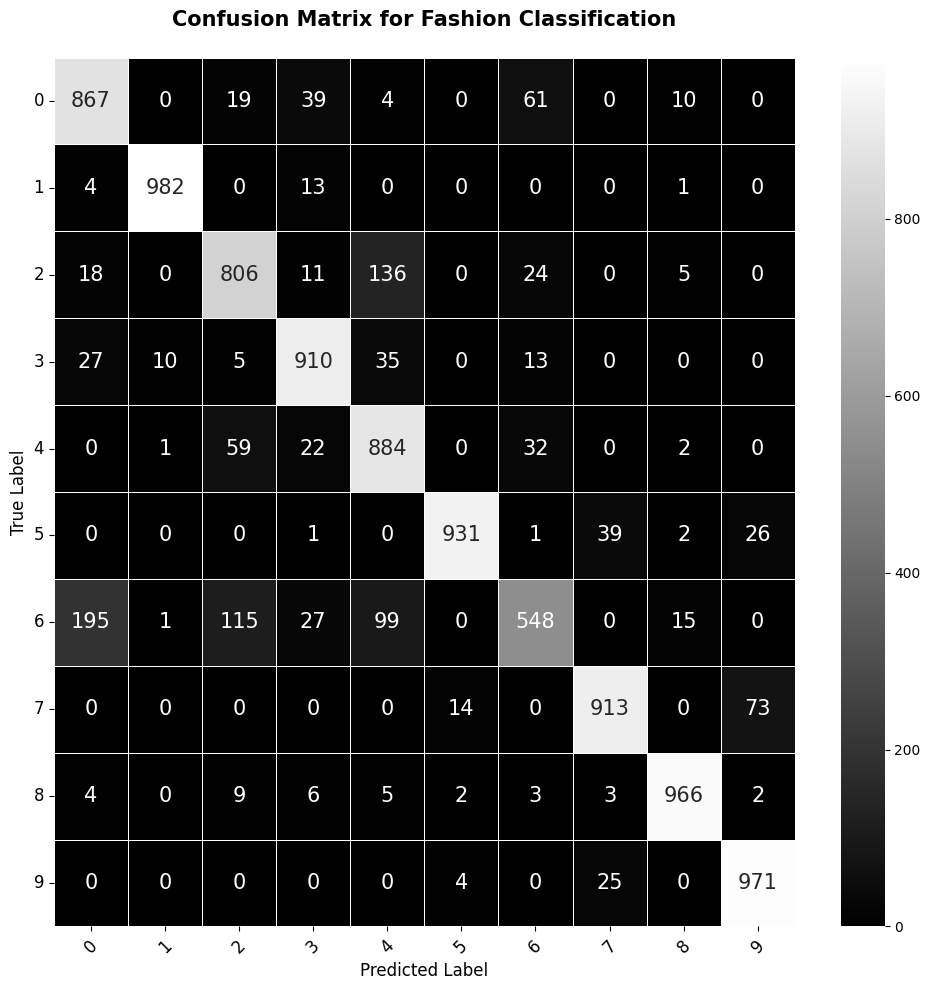

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
con_mat = confusion_matrix(y_test_fash_eval, y_predict_fash)

# Set style (optional)
plt.style.use('default')

# Create the heatmap with improved visual aesthetics
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray", cbar=True)

# Improve readability of labels
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels
plt.yticks(fontsize=12, rotation=0)   # Rotate y-axis labels

# Add title and axis labels
plt.title('Confusion Matrix for Fashion Classification\n', fontweight='bold', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Ensure that labels fit well
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.80      0.81      0.80      1000
           3       0.88      0.91      0.90      1000
           4       0.76      0.88      0.82      1000
           5       0.98      0.93      0.95      1000
           6       0.80      0.55      0.65      1000
           7       0.93      0.91      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.97      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [37]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


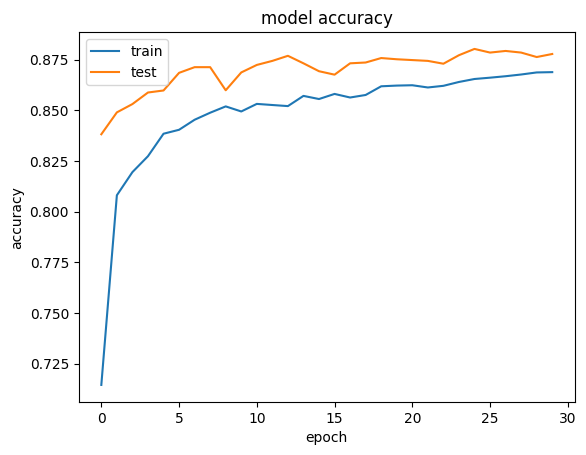

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

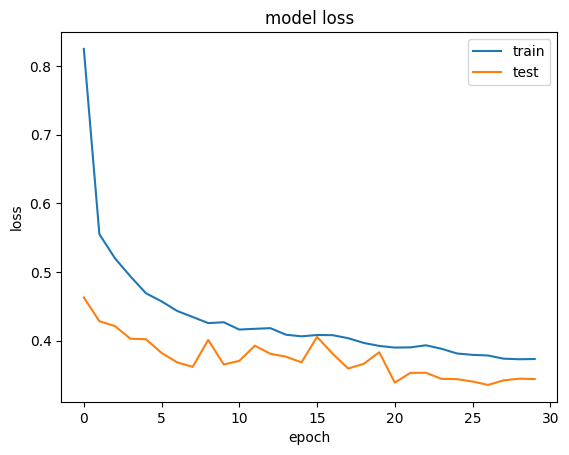

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# Evaluating the model with single image

In [40]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[3],:].values) #1D array
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_fashion_eval=np.argmax(y_test_fashion, axis=1) #y_test_digit_eval provides the true class indices of the entire test dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [41]:
print(y_predict)

[2]


In [42]:
y_test_fashion_eval

array([0, 1, 2, ..., 8, 8, 1])

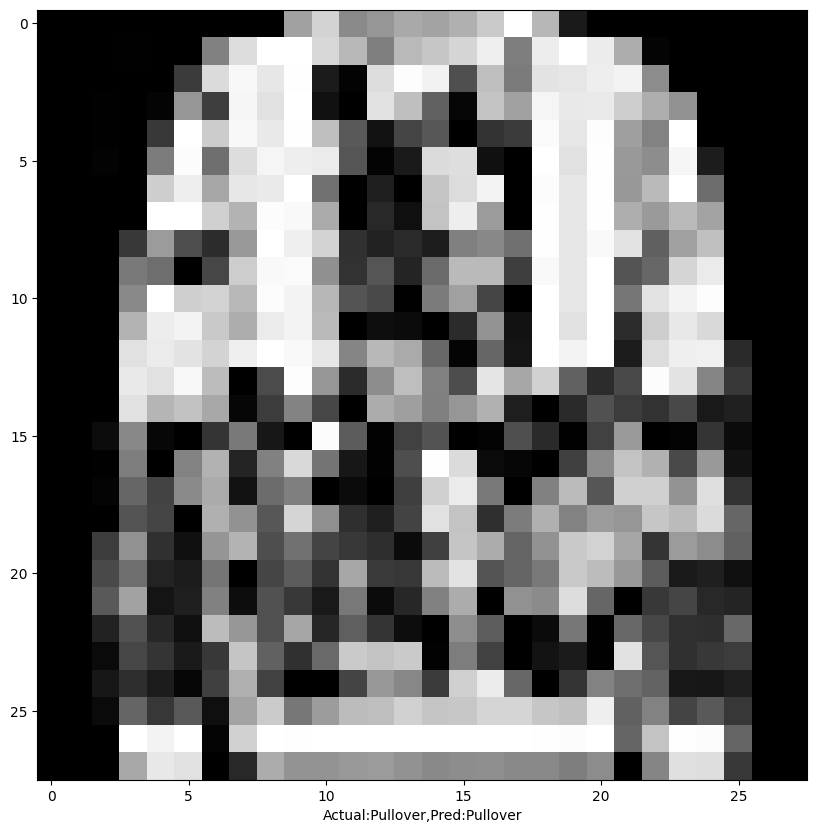

In [46]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_test_reshape[3], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[3])],col_names[y_predict[0]]))
plt.show()
